In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df = sns.load_dataset("mpg")

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Ungrouped Frequency

In [28]:
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

<Axes: ylabel='origin'>

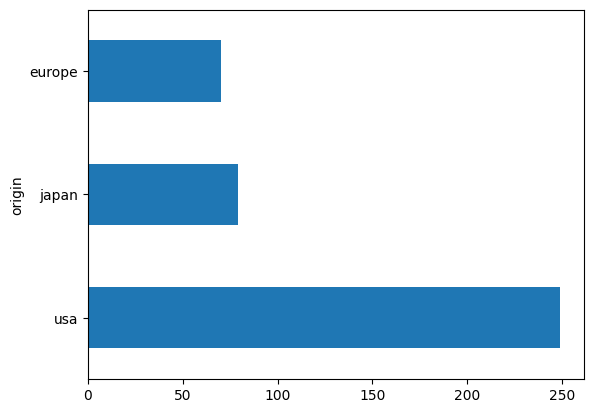

In [30]:
df["origin"].value_counts().plot(kind = "barh")

In [31]:
df["model_year"].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [32]:
pd.crosstab(df["origin"],  "Number of cars")

col_0,Number of cars
origin,
europe,70
japan,79
usa,249


In [33]:
pd.crosstab(df["origin"],  df["model_year"])

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,5,4,5,7,6,6,8,4,6,4,9,4,2
japan,2,4,5,4,6,4,4,6,8,2,13,12,9
usa,22,20,18,29,15,20,22,18,22,23,7,13,20


# Relative Frequency

In [34]:
cars_in_country = pd.crosstab(df["origin"],  "Number of cars")

In [35]:
cars_in_country["relative frequency"]=  cars_in_country["Number of cars"]/sum(cars_in_country["Number of cars"])

In [36]:
cars_in_country

col_0,Number of cars,relative frequency
origin,,
europe,70,0.175879
japan,79,0.198492
usa,249,0.625628


# Percentage frequency

In [37]:
cars_in_country["Percentage frequency"] = cars_in_country["relative frequency"]*100

In [38]:
cars_in_country

col_0,Number of cars,relative frequency,Percentage frequency
origin,,,
europe,70,0.175879,17.587940
japan,79,0.198492,19.849246
usa,249,0.625628,62.562814


<Axes: ylabel='count'>

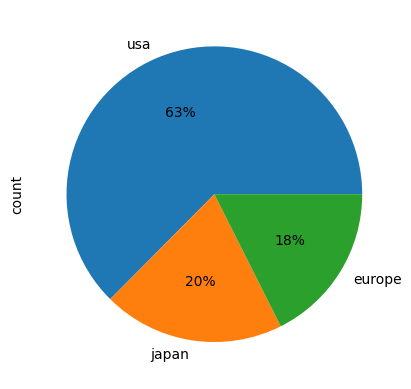

In [39]:
df["origin"].value_counts().plot(kind = "pie", autopct = "%1.f%%" )

# Grouped Frequency

<Axes: >

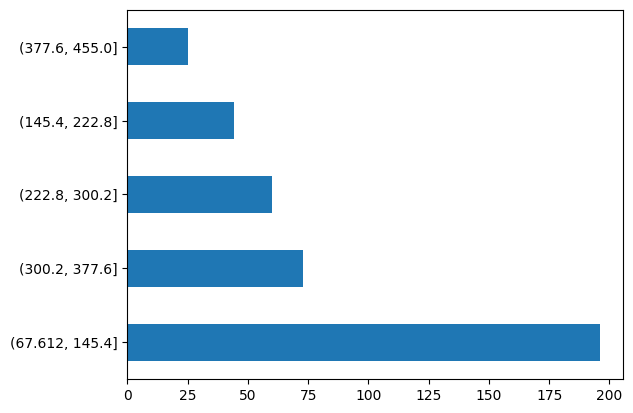

In [42]:
df["displacement"].value_counts( bins=5).plot(kind='barh')

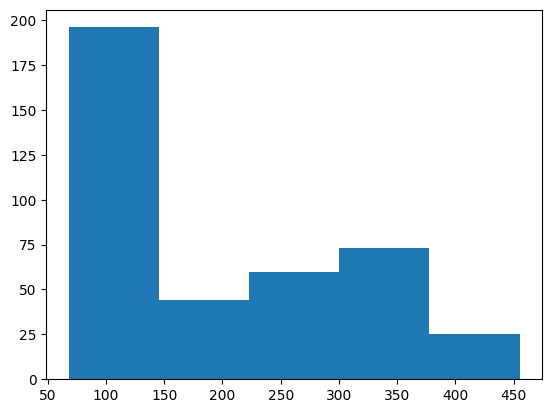

In [43]:
plt.hist(df["displacement"],bins = 5)
plt.show()

In [44]:
df["horsepower"].value_counts( bins=5,sort = False)

(45.815000000000005, 82.8]    122
(82.8, 119.6]                 164
(119.6, 156.4]                 66
(156.4, 193.2]                 27
(193.2, 230.0]                 13
Name: count, dtype: int64

(array([122., 164.,  66.,  27.,  13.]),
 array([ 46. ,  82.8, 119.6, 156.4, 193.2, 230. ]),
 <BarContainer object of 5 artists>)

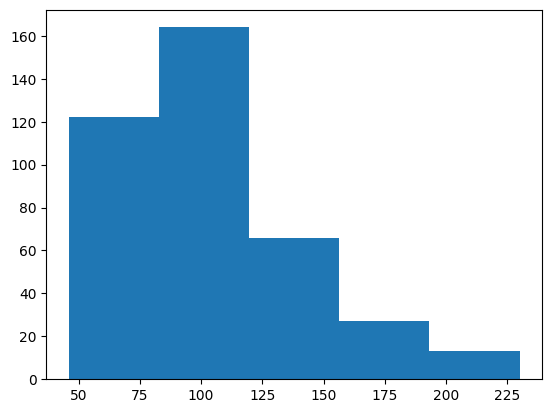

In [45]:
plt.hist(df["horsepower"],bins =5)

In [67]:
data = df["horsepower"].value_counts( bins=5,sort = False).reset_index().rename(columns={"index":"horsepower","count":"Frequency of cars"})

In [72]:
data["Relative Frequency"]= data["Frequency of cars"]/sum(data["Frequency of cars"])
data

,horsepower,Frequency of cars,Relative Frequency,Percentage Frequency
0,"(45.815000000000005, 82.8]",122,0.311224,31.122449
1,"(82.8, 119.6]",164,0.418367,41.836735
2,"(119.6, 156.4]",66,0.168367,16.836735
3,"(156.4, 193.2]",27,0.068878,6.887755
4,"(193.2, 230.0]",13,0.033163,3.316327


In [73]:
data["Percentage Frequency"]= data["Relative Frequency"]*100 

<Axes: ylabel='count'>

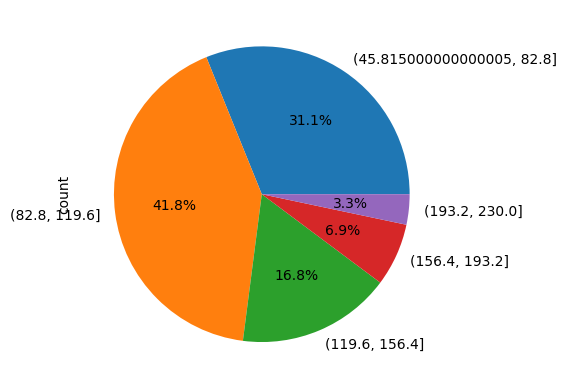

In [74]:
df["horsepower"].value_counts( bins=5,sort = False).plot(kind="pie",autopct = "%1.1f%%")

In [75]:
df["weight"].value_counts(bins = 10, sort = False)

(1609.472, 1965.7]    31
(1965.7, 2318.4]      90
(2318.4, 2671.1]      59
(2671.1, 3023.8]      54
(3023.8, 3376.5]      37
(3376.5, 3729.2]      40
(3729.2, 4081.9]      29
(4081.9, 4434.6]      34
(4434.6, 4787.3]      18
(4787.3, 5140.0]       6
Name: count, dtype: int64

In [76]:
df[(df["weight"]>4787.3) & (df["weight"]<5140.1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw)
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
104,12.0,8,400.0,167.0,4906,12.5,73,usa,ford country


In [77]:
df.sort_values("weight", ascending = False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
44,13.0,8,400.0,175.0,5140,12.0,71,usa,pontiac safari (sw)
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
42,12.0,8,383.0,180.0,4955,11.5,71,usa,dodge monaco (sw)
90,12.0,8,429.0,198.0,4952,11.5,73,usa,mercury marquis brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
...,...,...,...,...,...,...,...,...,...
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
345,35.1,4,81.0,60.0,1760,16.1,81,japan,honda civic 1300
343,39.1,4,79.0,58.0,1755,16.9,81,japan,toyota starlet
144,31.0,4,76.0,52.0,1649,16.5,74,japan,toyota corona


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(1609.472, 1965.7]'),
  Text(1, 0, '(1965.7, 2318.4]'),
  Text(2, 0, '(2318.4, 2671.1]'),
  Text(3, 0, '(2671.1, 3023.8]'),
  Text(4, 0, '(3023.8, 3376.5]'),
  Text(5, 0, '(3376.5, 3729.2]'),
  Text(6, 0, '(3729.2, 4081.9]'),
  Text(7, 0, '(4081.9, 4434.6]'),
  Text(8, 0, '(4434.6, 4787.3]'),
  Text(9, 0, '(4787.3, 5140.0]')])

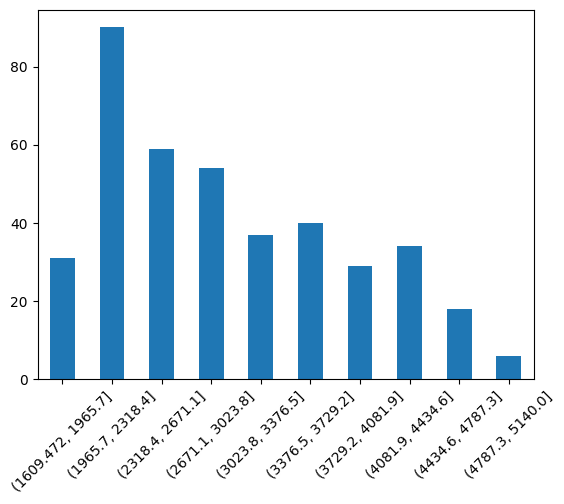

In [81]:
df["weight"].value_counts(bins = 10, sort = False).plot(kind = "bar")
plt.xticks(rotation = 45)